# Following OSEMN framework

- but this exercise only do until Explore
- https://pro.thelead.io/t/day-6-write-your-first-data-science-program/812

## Obtain

- Load the dataset

In [51]:
# load necessary packages
import pandas as pd
import matplotlib.pyplot as plt


# chosen retail data from https://www.kaggle.com/manjeetsingh/retaildataset
feat_df = pd.read_csv("/Users/dwihadyan/Downloads/theleadio/ds-exploration/p0/data/Features data set.csv")
sales_df = pd.read_csv("/Users/dwihadyan/Downloads/theleadio/ds-exploration/p0/data/sales data-set.csv")
stores_df = pd.read_csv("/Users/dwihadyan/Downloads/theleadio/ds-exploration/p0/data/stores data-set.csv")

## Scrub

- Scrub the data such that it is clean & ready to be analysed & implemented into a model

In [53]:
# ensure datetime in right format

feat_df['Date'] = pd.to_datetime(feat_df['Date'])
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [54]:
# head, tail , random sample

print(feat_df.head(3))
print(sales_df.tail(3))
print(stores_df.sample(3))

   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-05-02        42.31       2.572        NaN        NaN        NaN   
1      1 2010-12-02        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN  211.289143         8.106      False  
        Store  Dept       Date  Weekly_Sales  IsHoliday
421567     45    98 2012-12-10       1061.02      False
421568     45    98 2012-10-19        760.01      False
421569     45    98 2012-10-26       1076.80      False
    Store Type    Size
2       3    B   37392
7       8    A  155078
15     16    B   57197


In [55]:
# merge the three dataframe into one, how we do it is we merge it on whichever columns that both df do shares

# combine feat_df & sales_df
df = pd.merge(sales_df, feat_df, on = ['Store', 'Date', 'IsHoliday'], how = 'left')

# combine df & stores_df
df = pd.merge(df, stores_df, on = ['Store'], how = 'left')

df.sample(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
316073,33,17,2010-10-29,293.08,False,71.34,3.130,NaN,NaN,NaN,NaN,NaN,126.436419,9.265,A,39690
223215,23,52,2011-07-29,2657.82,False,69.55,3.898,NaN,NaN,NaN,NaN,NaN,135.963935,4.584,B,114533
160016,17,20,2010-08-27,4239.63,False,65.03,2.854,NaN,NaN,NaN,NaN,NaN,126.089290,6.697,B,93188


In [56]:
# replace all NaN to 0 

df = df.fillna(0)
df.sample(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
393135,42,17,2011-10-06,277.14,False,84.57,3.981,0.00,0.0,0.00,0.00,0.00,129.035710,8.494,C,39690
161892,17,33,2010-12-24,10633.42,False,26.58,2.846,0.00,0.0,0.00,0.00,0.00,126.983581,6.885,B,93188
24016,3,26,2012-03-08,2056.48,False,86.55,3.417,5683.49,37.2,0.04,2484.22,639.29,225.463633,6.334,B,37392


In [57]:
# convert 'Type' column from categorical to numerical

types_encoded, types = df['Type'].factorize()
df['Type'] = types_encoded

df.sample(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
113564,12,44,2012-04-20,5923.56,False,66.73,4.222,8679.29,1265.97,7.70,878.01,4358.86,131.117333,11.627,1,112238
91264,10,28,2011-01-04,1429.63,False,67.64,3.772,0.00,0.00,0.00,0.00,0.00,128.719935,8.494,1,126512
166998,17,95,2012-03-08,60320.80,False,72.94,3.512,13721.83,56.60,8.34,12343.79,1797.84,130.737871,5.936,1,93188


In [58]:
# make sure that no duplicated feature column

print(f"number of feature columns that are duplicated : {df.duplicated().sum()}")
df.drop_duplicates(inplace = True)

number of feature columns that are duplicated : 0


In [59]:
# make sure that are no null values in our data table

# create new row called 'column type' and populate it with data type of each columns
col_info = pd.DataFrame(df.dtypes).T.rename(index = {0 : 'column type'})

# create new row called 'no of null val' and populate it with data type of each columns (clean data should return all 0)
col_info = col_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index = {0 : 'no of null val in that column'}))

# create new row called 'no of null val %' and populate it with data type of each columns (clean data should return all 0)
col_info = col_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index = {0 : 'no of null val in that column %'}))

In [60]:
col_info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
column type,int64,int64,datetime64[ns],float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
no of null val in that column,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
no of null val in that column %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Explore

- Understand more about the data (both feature & target variable)

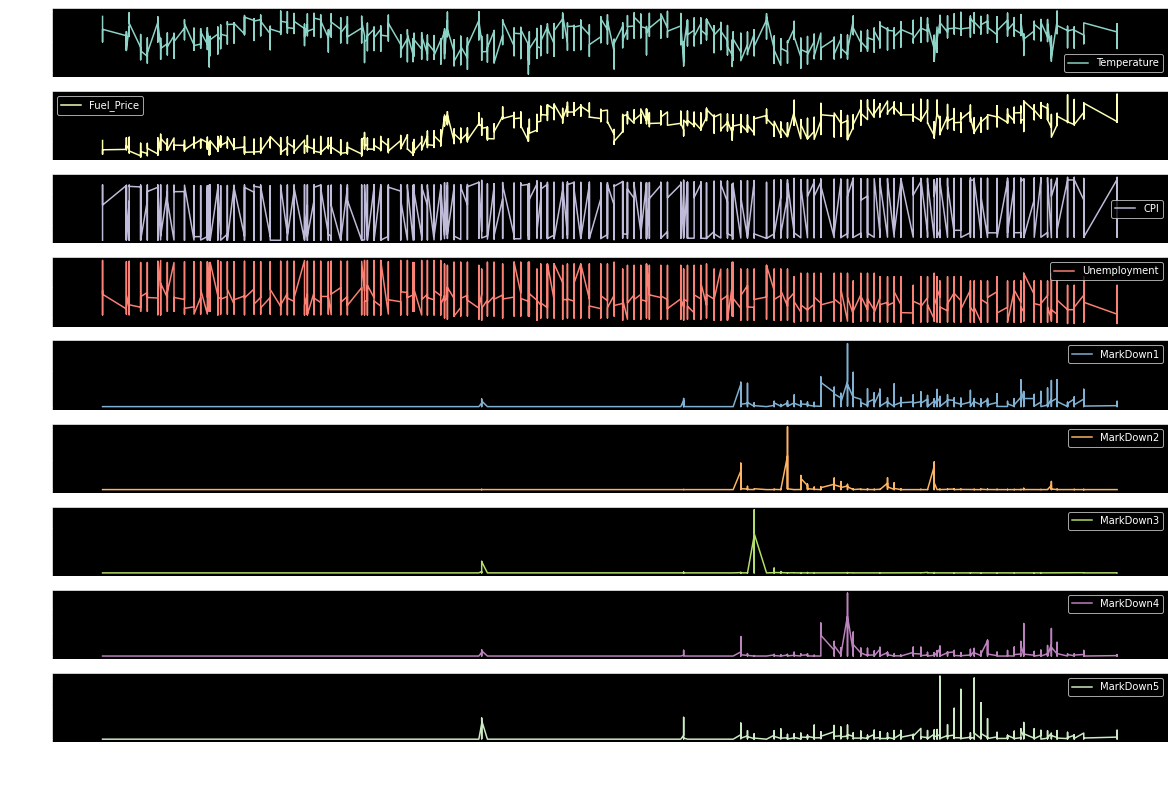

In [61]:
# features EDA 

df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3' ,'MarkDown4' ,'MarkDown5']].plot(x = 'Date', subplots = True, figsize = (20,15))

plt.show()


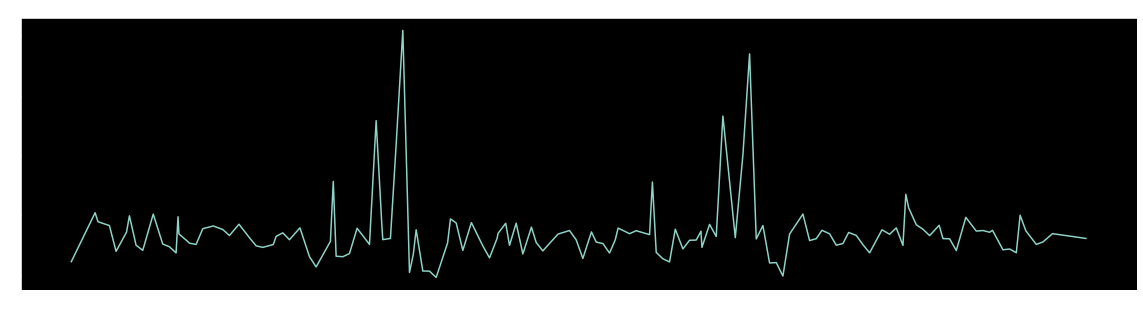

In [62]:
# target variable EDA

# want to predict sales, hence we add up all weekly sales from every shop
df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

## Model & iNterpret 

- Not within this exercise course (exercise left to intrested readers lmao)